Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 8 rows containing missing values (geom_segment).”


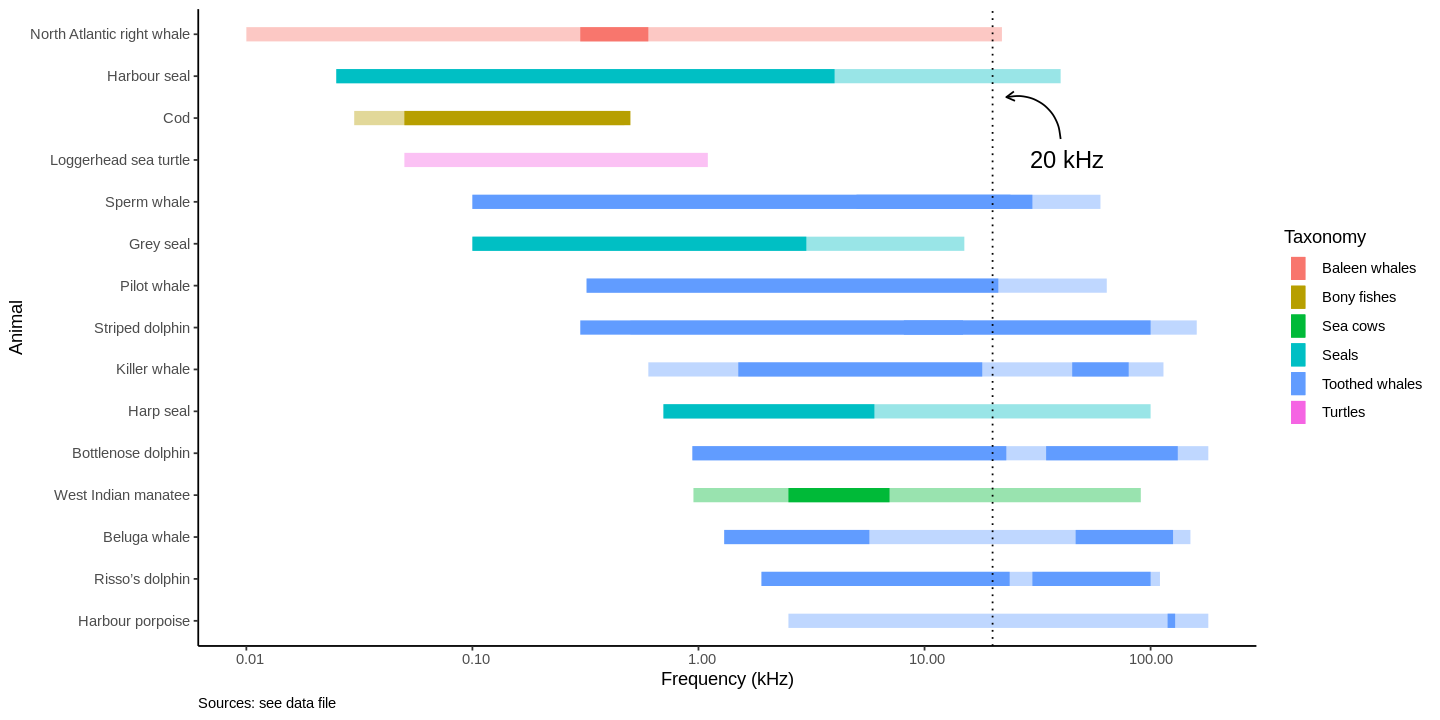

In [8]:
# load libraries
library(ggplot2)
library(repr)

# read the data
ranges_data <- read.csv("https://gitlab.com/alvarosaurus/blog/-/raw/master/posts/data/marine_animals.csv?inline=false")

# image aspect ratio
options(repr.plot.width=12, repr.plot.height=6)

# ranges, sorted by best hearing frequency, ascending
ranges_plot <- ggplot(ranges_data)

# full hearing ranges
ranges_plot <- ranges_plot + 
    geom_linerange(
        size = 4, 
        alpha=.4, 
        aes(
            x=reorder(Animal, -hearing_min), 
            ymin = hearing_min/1000, 
            ymax = hearing_max/1000, 
            color = Taxonomy))

# vocalization ranges
ranges_plot <- ranges_plot + 
    geom_linerange(
        size = 4, 
        aes(
            x=reorder(Animal, -hearing_min), 
            ymin = voc_min/1000, 
            ymax = voc_max/1000, 
            color = Taxonomy))

# click ranges for dolphins
ranges_plot <- ranges_plot + 
    geom_linerange(
        size = 4, 
        aes(
            x=reorder(Animal, -hearing_min), 
            ymin = clicks_min/1000, 
            ymax = clicks_max/1000, 
            color = Taxonomy))

# axes and labels
ranges_plot <- ranges_plot + 
    scale_y_log10(labels = function(x) format(x, scientific = FALSE)) +
    labs(
        x="Animal",
        y="Frequency (kHz)", 
        caption="Sources: see data file") +
    coord_flip()

# theme and caption
ranges_plot <- ranges_plot + 
    theme_classic() +
    theme(plot.caption = element_text(hjust=0))

# annotations
ranges_plot <- ranges_plot + 
    geom_hline(yintercept = 20, linetype=3) + # coords are flipped
    annotate("text", x=12, y=20, label="20 kHz", hjust=-0.5, size=5) +
    annotate("curve", 
             x=12.5, y=40, xend=13.5, yend=23, 
             arrow=arrow(length=unit(0.2, "cm")))

ranges_plot
